In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [265]:
grants_analysis = pd.read_csv('for_analysis.csv', compression = 'gzip')
grants_analysis.info()
grants_analysis.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84591 entries, 0 to 84590
Data columns (total 19 columns):
application_id       84591 non-null int64
activity             84574 non-null object
application_type     82964 non-null float64
arra_funded          84574 non-null object
funding_ics          84436 non-null object
funding_mechanism    84558 non-null object
fy                   84591 non-null int64
nih_spending_cats    73811 non-null object
project_start        70517 non-null object
project_end          70780 non-null object
project_terms        81585 non-null object
study_section        78863 non-null object
support_year         82964 non-null float64
funds                82464 non-null float64
pi_ids               84358 non-null float64
num_pis              84591 non-null int64
org_name             84275 non-null object
org_country          84338 non-null object
org_zipcode          84165 non-null object
dtypes: float64(4), int64(3), object(12)
memory usage: 12.3+ MB


(84591, 19)

In [ ]:
#convert column dtypes to string
to_string = 'application_id activity application_type fy support_year pi_ids'.split()
grants_analysis[to_string] = grants_analysis[to_string].astype(str)

pd.set_option('display.max_columns', 50)
grants_analysis.head()

### Description of data in each column 

In [258]:
col_info = pd.read_csv('grant_col_info_all.csv')
pd.set_option('display.max_colwidth', 500)
col_info.ix[col_info['column_name'].str.contains('application_t')]
pd.set_option('display.max_colwidth', 50)

,column_name,descriptions
3,application_type,"A one-digit code to identify the type of application funded: 1 = New application 2 = Competing continuation (also, competing renewal) 3 = Application for additional (supplemental) support. There are two kinds of type 3competing revisions (which are peer-reviewed and administrative supplements) 4 = Competing extension for an R37 award or first non-competing year of a Fast Track SBIR/STTR award ..."


In [259]:
grants_analysis.isnull().sum()

application_id           0
activity                17
application_type      1627
arra_funded             17
funding_ics            155
funding_mechanism       33
fy                       0
nih_spending_cats    10780
project_start        14074
project_end          13811
project_terms         3006
study_section         5728
support_year          1627
funds                 2127
pi_ids                 233
num_pis                  0
org_name               316
org_country            253
org_zipcode            426
dtype: int64

Most nulls will not affect the ability to identify who the grant was awarded to. The identification columns are application_id (no nulls), pi_ids, org_name, org_country and org_zipcode. org_zipcode has the most nulls, but this is because several countries did not list a zipcode. The second largest column of the identiers is org_name.

In [260]:
org_null = grants_analysis.ix[grants_analysis['org_name'].isnull()]
org_null['funding_mechanism'].value_counts()

non sbir/sttr contracts    148
interagency agreements     124
intramural research         23
sbir/sttr contracts          4
Name: funding_mechanism, dtype: int64

Non-US countries awarded with NIH grants.

In [74]:
#grants_analysis.ix[grants_analysis['org_country'] != 'united states'].org_country.value_counts()

In [270]:
print('The total amount of funding awarded by the NIH in 2016 was $' + \
      '{0:,}'.format(grants_analysis['funds'].sum()) + ' for ' \
     + '{0:,}'.format(len(grants_analysis)) + ' total grants.')

print('Approximately $' + '{0:,}'.format(round(grants_analysis['funds'].sum() / len(grants_analysis))) + \
      ' were awarded per grant on average.')

print('{0:,}'.format(grants_analysis['pi_ids'].value_counts().count()) + ' unique PIs and ' + \
      str(grants_analysis['org_name'].value_counts().count()) + ' unique organizations were listed.')

The total amount of funding awarded by the NIH in 2016 was $35,261,559,762.0 for 84,591 total grants.
Approximately $416,848.0 were awarded per grant on average.
48,753 unique PIs and 3210 unique organizations were listed.


## Funding by grant series

In [273]:
series = list(grants_analysis['activity'])
for i in range(len(series)):
    series[i] = series[i][0]

grants_analysis['series'] = series
grants_analysis.head(2)

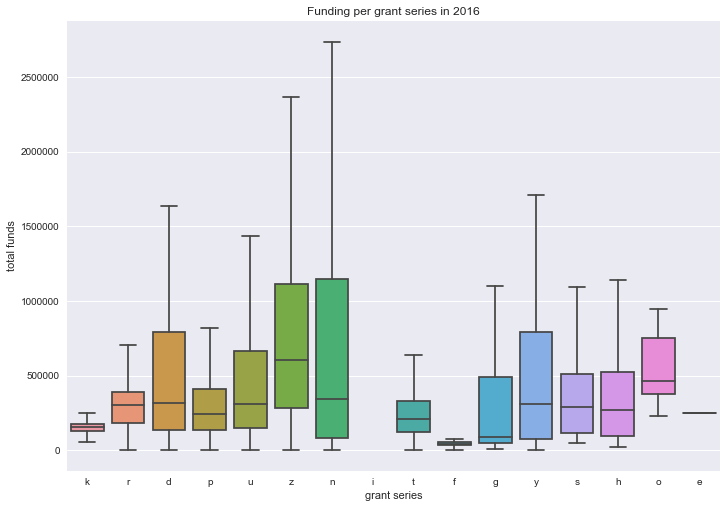

In [224]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
p = sns.boxplot(x = grants_analysis['series'], y = grants_analysis['funds'], data = grants_analysis,
           showfliers = False);
p.set(xlabel = 'grant series', ylabel = 'total funds', title = 'Funding per grant series in 2016');

Distribution of funding per investigator by grant series

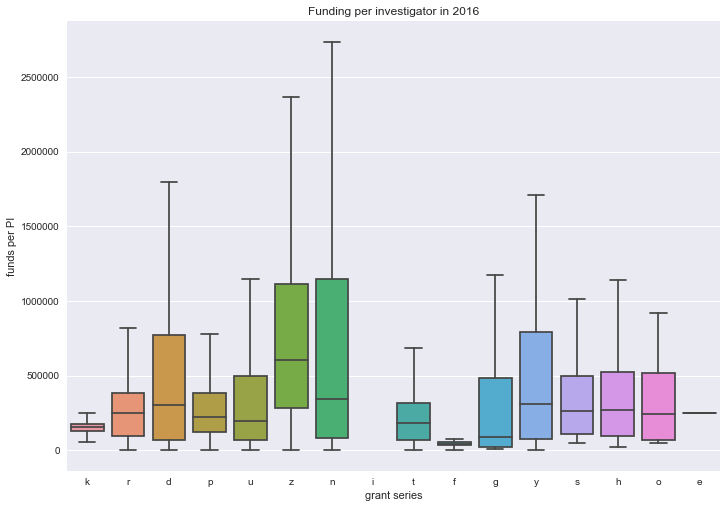

In [225]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
p = sns.boxplot(x = grants_analysis['series'], y = (grants_analysis['funds'] / grants_analysis['num_pis']), 
                data = grants_analysis, showfliers = False);
p.set(xlabel = 'grant series', ylabel = 'funds per PI', title = 'Funding per investigator in 2016');

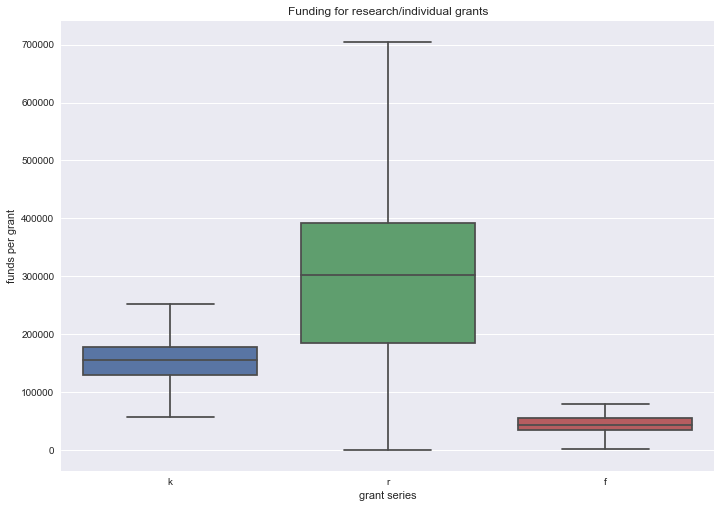

In [226]:
#individual grants: r, f, k
indiv_grants = grants_analysis.ix[(grants_analysis['series'] == 'r') | (grants_analysis['series'] == 'f') | 
                                  (grants_analysis['series'] == 'k')]

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
p = sns.boxplot(x = indiv_grants['series'], y = indiv_grants['funds'], 
                data = indiv_grants, showfliers = False);
p.set(xlabel = 'grant series', ylabel = 'funds per grant', title = 'Funding for research/individual grants');

#### Plot % of total NIH budget allocated to each grant series

In [275]:
by_series = grants_analysis.groupby('series', axis = 0)
by_series.describe()

funds       num_pis
series                                  
d      count  5.090000e+02    509.000000
       mean   6.198296e+05      1.538310
       std    7.572290e+05      0.896738
       min    1.000000e+00      1.000000
       25%    1.332050e+05      1.000000
       50%    3.149770e+05      1.000000
       75%    7.900000e+05      2.000000
       max    4.411432e+06      5.000000
e      count  1.000000e+00      1.000000
       mean   2.499930e+05      1.000000
       std             NaN           NaN
       min    2.499930e+05      1.000000
       25%    2.499930e+05      1.000000
       50%    2.499930e+05      1.000000
       75%    2.499930e+05      1.000000
       max    2.499930e+05      1.000000
f      count  3.253000e+03   3276.000000
       mean   4.339844e+04      1.000611
       std    1.243336e+04      0.024705
       min    1.000000e+00      1.000000
       25%    3.427700e+04      1.000000
       50%    4.357600e+04      1.000000
       75%    5.604200e+04      1.000000
       max    7.909700e+04      2.000000
g      count  1.340000e+02    134.000000
...                    ...           ...
t      max    2.446979e+06      8.000000
u      count  1.125300e+04  11267.000000
       mean   7.448254e+05      2.101802
       std    1.844933e+06      1.814841
       min    0.000000e+00      1.000000
       25%    1.500000e+05      1.000000
       50%    3.114840e+05      1.000000
       75%    6.641300e+05      3.000000
       max    5.828190e+07     12.000000
y      count  1.480000e+02    148.000000
       mean   1.217110e+06      1.000000
       std    4.054275e+06      0.000000
       min    2.575000e+03      1.000000
       25%    7.875000e+04      1.000000
       50%    3.107500e+05      1.000000
       75%    7.908178e+05      1.000000
       max    4.263400e+07      1.000000
z      count  3.029000e+03   3168.000000
       mean   1.234186e+06      1.000631
       std    6.425564e+06      0.025122
       min    2.262000e+03      1.000000
       25%    2.803510e+05      1.000000
       50%    6.065200e+05      1.000000
       75%    1.114919e+06      1.000000
       max    3.006051e+08      2.000000

[128 rows x 2 columns]

In [283]:
budget = grants_analysis['funds'].sum()
sum_by_series = by_series.sum()
sum_by_series['% budget'] = sum_by_series['funds'] / budget

In [284]:
sum_by_series

,funds,num_pis,% budget
series,,,
d,3.154933e+08,783,0.008947
e,2.499930e+05,1,0.000007
f,1.411751e+08,3278,0.004004
g,5.789439e+07,182,0.001642
h,2.453131e+07,70,0.000696
i,NaN,1711,NaN
k,6.536692e+08,4055,0.018538
n,1.886037e+09,1481,0.053487
o,3.533306e+07,134,0.001002


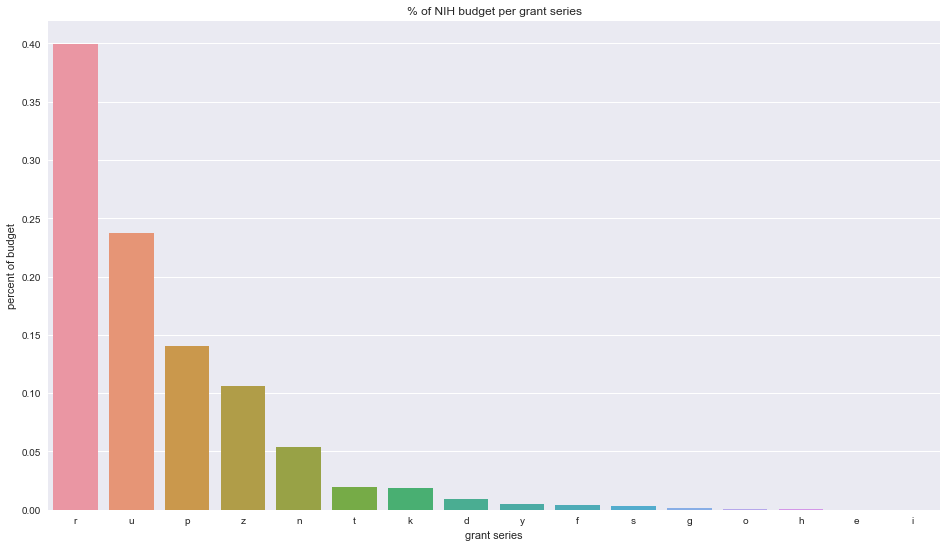

In [297]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
sort_percent = sum_by_series.sort_values(by = '% budget', ascending = False)
ax = sns.barplot(x = sort_percent.index, y = sort_percent['% budget'], data = sort_percent);
_ = ax.set(xlabel = 'grant series', ylabel = 'percent of budget', 
          title = '% of NIH budget per grant series');

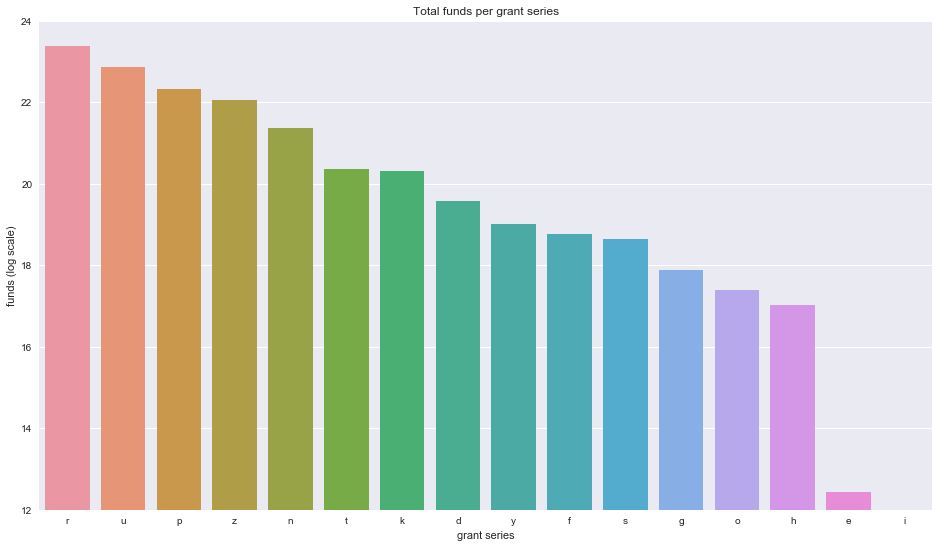

In [302]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
sort_percent = sum_by_series.sort_values(by = 'funds', ascending = False)
ax = sns.barplot(x = sort_percent.index, y = np.log(sort_percent['funds']), data = sort_percent);
_ = ax.set(xlabel = 'grant series', ylabel = 'funds (log scale)', 
          title = 'Total funds per grant series');
_ = ax.axes.set_ylim(12, 24)

## Funding by institute 

In [236]:
institute_funds = pd.read_csv('institute_funds.csv', compression = 'gzip')
institute_funds.head()

,application_id,institute,funds_awarded
0,9115627,nigms,194460.0
1,9128072,ninds,335781.0
2,9056435,fic,146822.0
3,9056435,nida,75000.0
4,9213716,nimh,1593922.0


#### Plot distribution of funds per individual grants awarded by specific institutions
(outliers excluded)

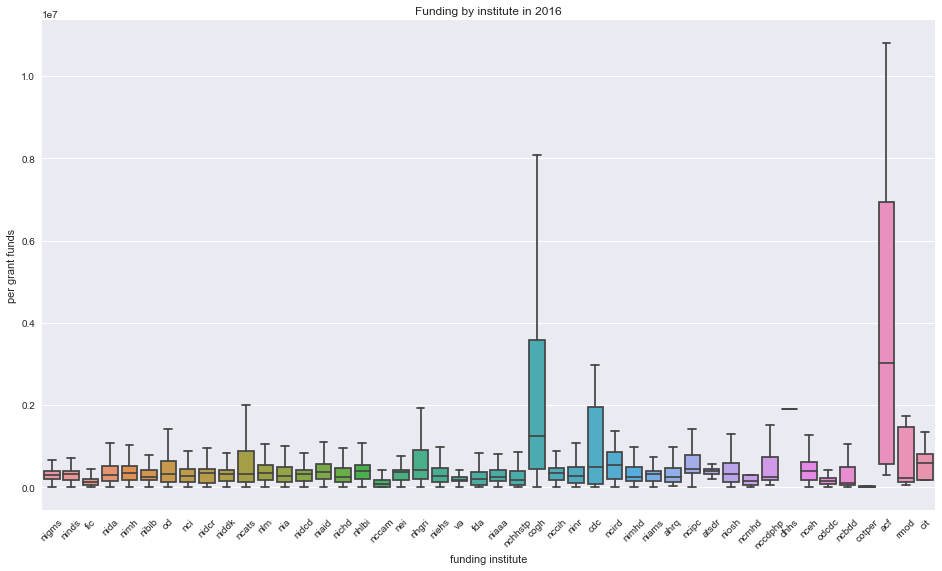

In [237]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
p = sns.boxplot(x = institute_funds['institute'], y = institute_funds['funds_awarded'], data = institute_funds,
           showfliers = False);
_ = p.set(xlabel = 'funding institute', ylabel = 'per grant funds', title = 'Funding by institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

#### Plot funds per grant awarded by each institute

In [239]:
#sum funds awarded grouped by institute to get the total funds awarded by each institute
total_funds = institute_funds.groupby('institute').sum().sort_values('funds_awarded', ascending = False)

#count the number of grants awarded by each institute
grants_per_inst = pd.DataFrame(institute_funds['institute'].value_counts())

total_funds = pd.merge(total_funds, grants_per_inst, left_index=True, right_index=True, how='outer')
total_funds = total_funds.rename(columns = {'institute':'counts'})

#individual application IDs are not relevant in aggregate
del total_funds['application_id']

total_funds.head()

,funds_awarded,counts
acf,112037202.0,17
ahrq,199199331.0,515
atsdr,14296146.0,32
cdc,50364200.0,37
cit,16952218.0,15


In [241]:
total_funds['per grant'] = total_funds['funds_awarded'] / total_funds['counts']

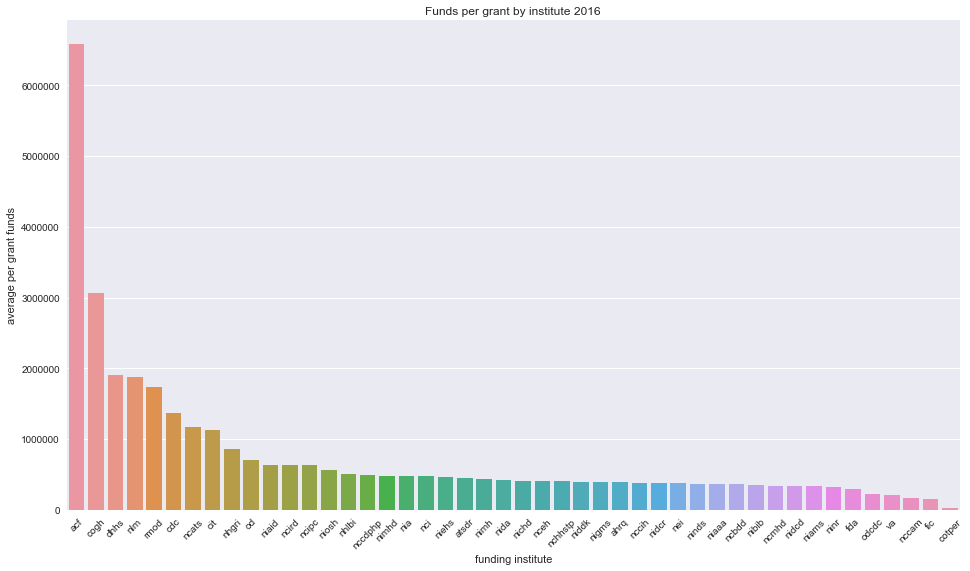

In [242]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
sort_per = total_funds.sort_values(by = 'per grant', ascending = False)
p = sns.barplot(x = sort_per.index, y = sort_per['per grant'], data = sort_per);
_ = p.set(xlabel = 'funding institute', ylabel = 'average per grant funds', 
          title = 'Funds per grant by institute 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

#place text over bars

#### Plot total funds awarded by each institute

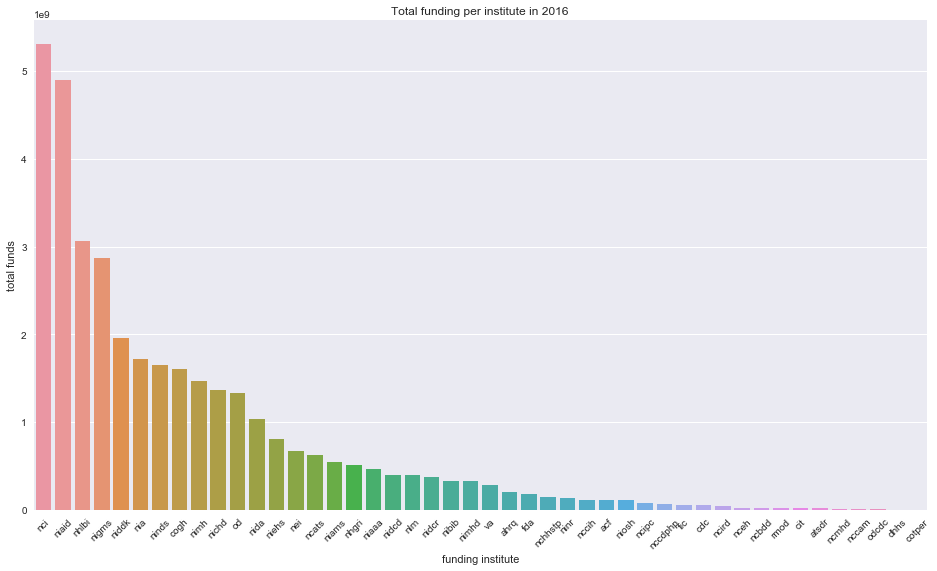

In [202]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
sort_fund = total_funds.sort_values('funds', ascending = False)
p = sns.barplot(x = sort_fund.index, y = sort_fund['funds'], data = sort_fund);
_ = p.set(xlabel = 'funding institute', ylabel = 'total funds', title = 'Total funding per institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

Plot funds on a log scale

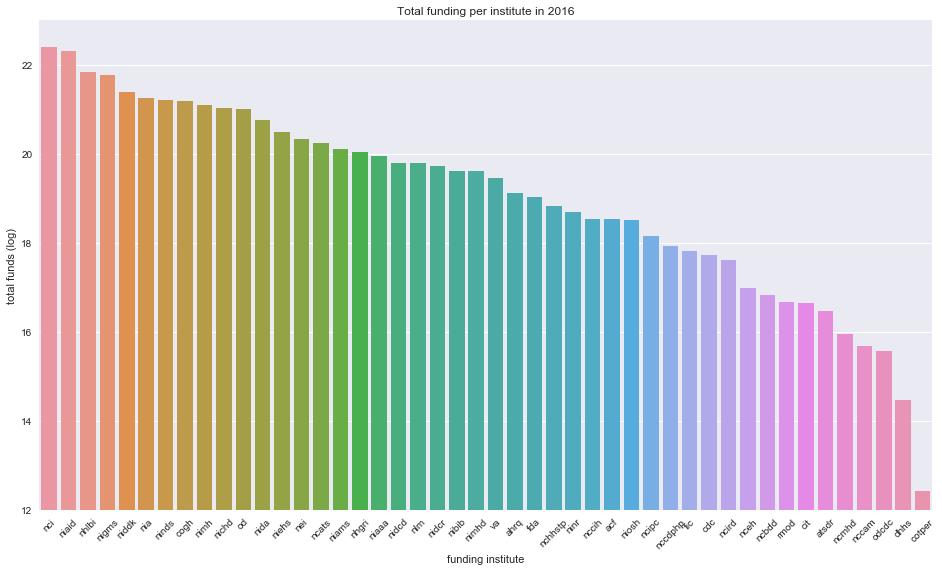

In [203]:
total_funds = institute_funds.groupby('institute').sum().sort_values('funds', ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
p = sns.barplot(x = sort_fund.index, y = np.log(sort_fund['funds']), data = sort_fund);
_ = p.set(xlabel = 'funding institute', ylabel = 'total funds (log)', title = 'Total funding per institute in 2016');
ylow = np.log(total_funds.min())
_ = p.axes.set_ylim(12, 23)
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

#### Plot total grants awarded by each institution

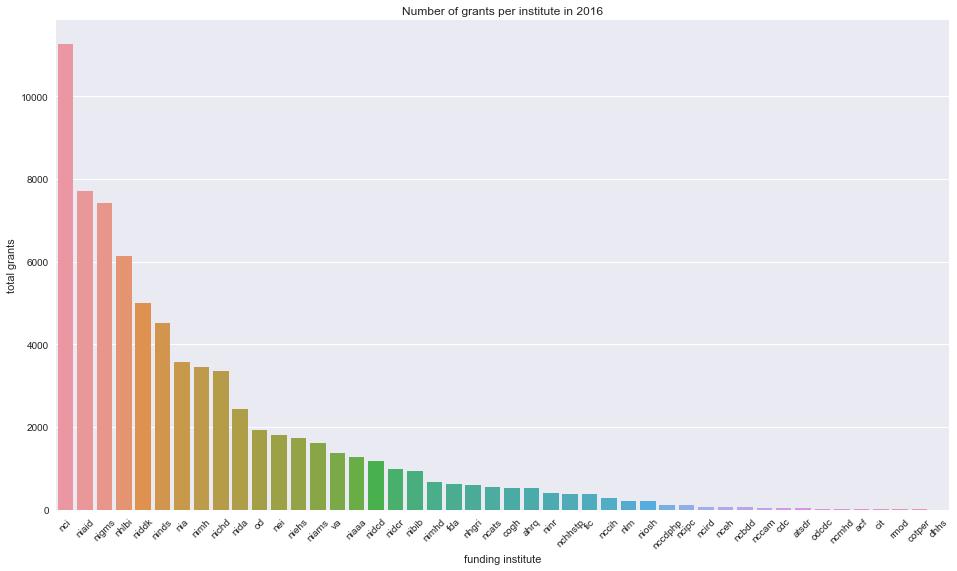

In [200]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
sort_count = total_funds.sort_values('counts', ascending = False)
p = sns.barplot(x = sort_count.index, y = sort_count['counts'], data = sort_count);
_ = p.set(xlabel = 'funding institute', ylabel = 'total grants', title = 'Number of grants per institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

Plot counts on a log scale

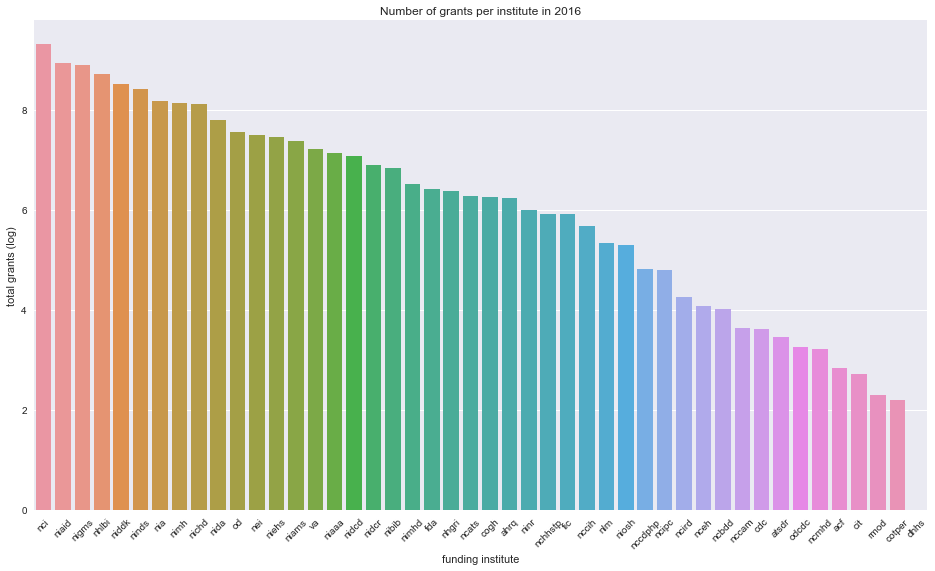

In [201]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
p = sns.barplot(x = sort_count.index, y = np.log(sort_count['counts']), data = sort_count);
_ = p.set(xlabel = 'funding institute', ylabel = 'total grants (log)', title = 'Number of grants per institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

## Grants by application type 

In [233]:
grants_analysis['application_type'].value_counts()

5.0    34339
1.0    21185
4.0    17123
3.0     4738
2.0     4246
7.0      898
6.0      361
9.0       67
8.0        7
Name: application_type, dtype: int64

In [ ]:
#geospatial data: grants per region
#Questions for analysis: how many grants are solo vs. joint? how many PIs have solo vs. joint grants?
#How many grants per organization?
#Total costs, avg cost per PI, institution